<a href="https://colab.research.google.com/github/sakshamo5/-Cats-vs-Dogs-Image-Classification-with-Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries for numerical operations, data manipulation, augmentation, preprocessing and data manipulation.
Importing 'os' library for interacting with the operating system and handling file paths.

In [ ]:
import numpy as np
import pandas as pd
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from google.colab import drive
drive.mount('/content/drive',force_remount = True)
%cd /content/drive/MyDrive/cats_vs_dogs/code

Mounted at /content/drive
/content/drive/MyDrive/cats_vs_dogs/code


Defining Constants and
Prepare Traning Data

['train', 'test']


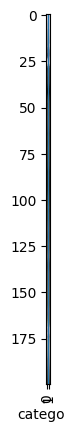

In [ ]:
print(os.listdir("../data"))


FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3


filenames = os.listdir("../data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()

df.tail()

df['category'].value_counts().plot.bar()

sample = random.choice(filenames)
image = load_img("../data/train/"+sample)
plt.imshow(image)


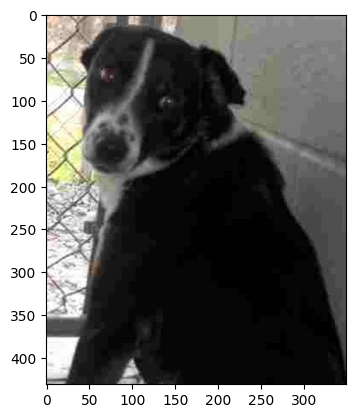

In [ ]:
sample = random.choice(filenames)
image = load_img("../data/train/"+sample)
plt.imshow(image)


Build the Model using tensorflow keras.
For our Convolutional Neural Network we will be emplementing 3 Convolutional layers each with a Maxpooling layer and Batch Normalization.

Flatten layer continued by Fully Connected layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax')) #Output layer with 2 distint outputs for Cat and Dog Classification

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,962 (1.16 MB)

 Trainable params: 302,338 (1.15 MB)

 Non-trainable params: 624 (2.44 KB)

Implements early stopping and learning rate reduction to optimize model training.
Prepares training and validation datasets using data augmentation and splitting the data.
Visualizes sample augmented images for inspection.


Found 16823 validated image filenames belonging to 2 classes.
Found 4206 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


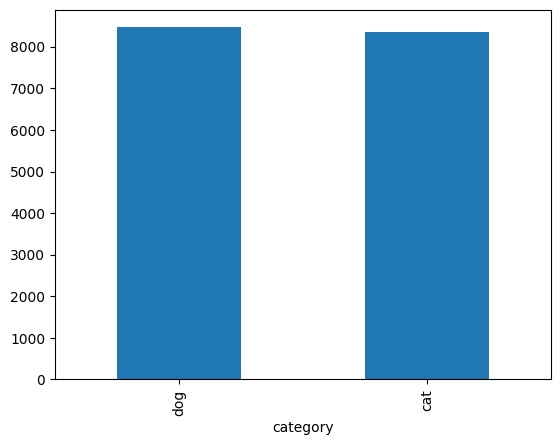

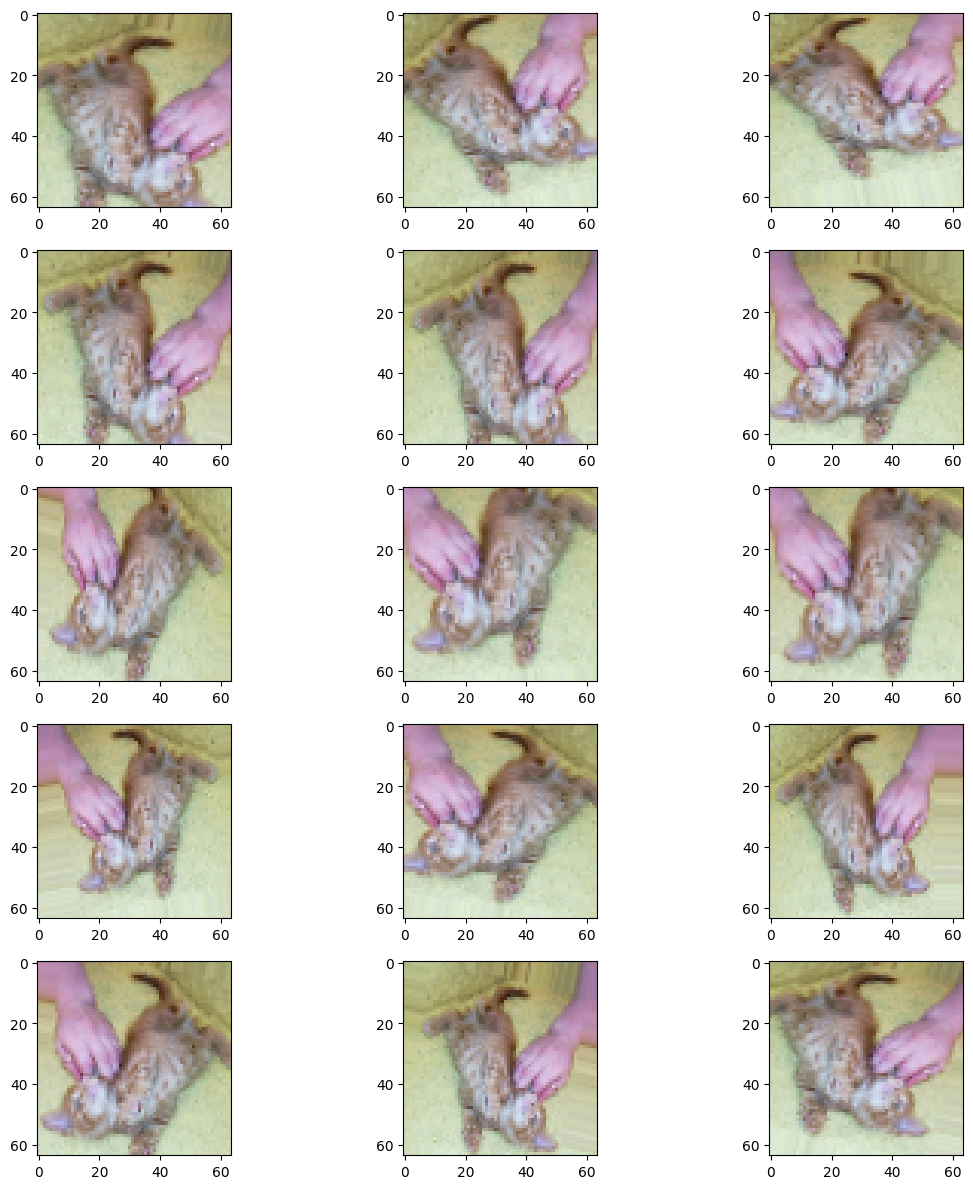

In [ ]:



from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

validate_df['category'].value_counts().plot.bar()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "../data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


Trains the model for 10 epochs using the training and validation data generators.

Utilizes early stopping and learning rate reduction callbacks to optimize performance.


In [ ]:
epochs=10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


Epoch 1/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 5825s 5s/step - accuracy: 0.5657 - loss: 0.8938 - val_accuracy: 0.6600 - val_loss: 0.6109 - learning_rate: 0.0010
Epoch 2/10
   1/1121 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.5333 - loss: 0.7655

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5333 - loss: 0.7655 - val_accuracy: 0.6667 - val_loss: 0.6060 - learning_rate: 0.0010
Epoch 3/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 216s 173ms/step - accuracy: 0.6416 - loss: 0.6357 - val_accuracy: 0.6840 - val_loss: 0.6031 - learning_rate: 0.0010
Epoch 4/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.7333 - loss: 0.5876 - val_accuracy: 0.3333 - val_loss: 0.6819 - learning_rate: 0.0010
Epoch 5/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 185s 164ms/step - accuracy: 0.6631 - loss: 0.6111 - val_accuracy: 0.7226 - val_loss: 0.5456 - learning_rate: 0.0010
Epoch 6/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8000 - loss: 0.5145 - val_accuracy: 0.8333 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 7/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 249s 169ms/step - accuracy: 0.6849 - loss: 0.5933 - val_accuracy: 0.7255 - val_loss: 0.5489 - learning_rate: 0.0010
Epoch 8/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.733

Plots training and validation loss on the first subplot and training/validation accuracy on the second.

Provides visual insights into model performance across epochs for analysis and debugging.


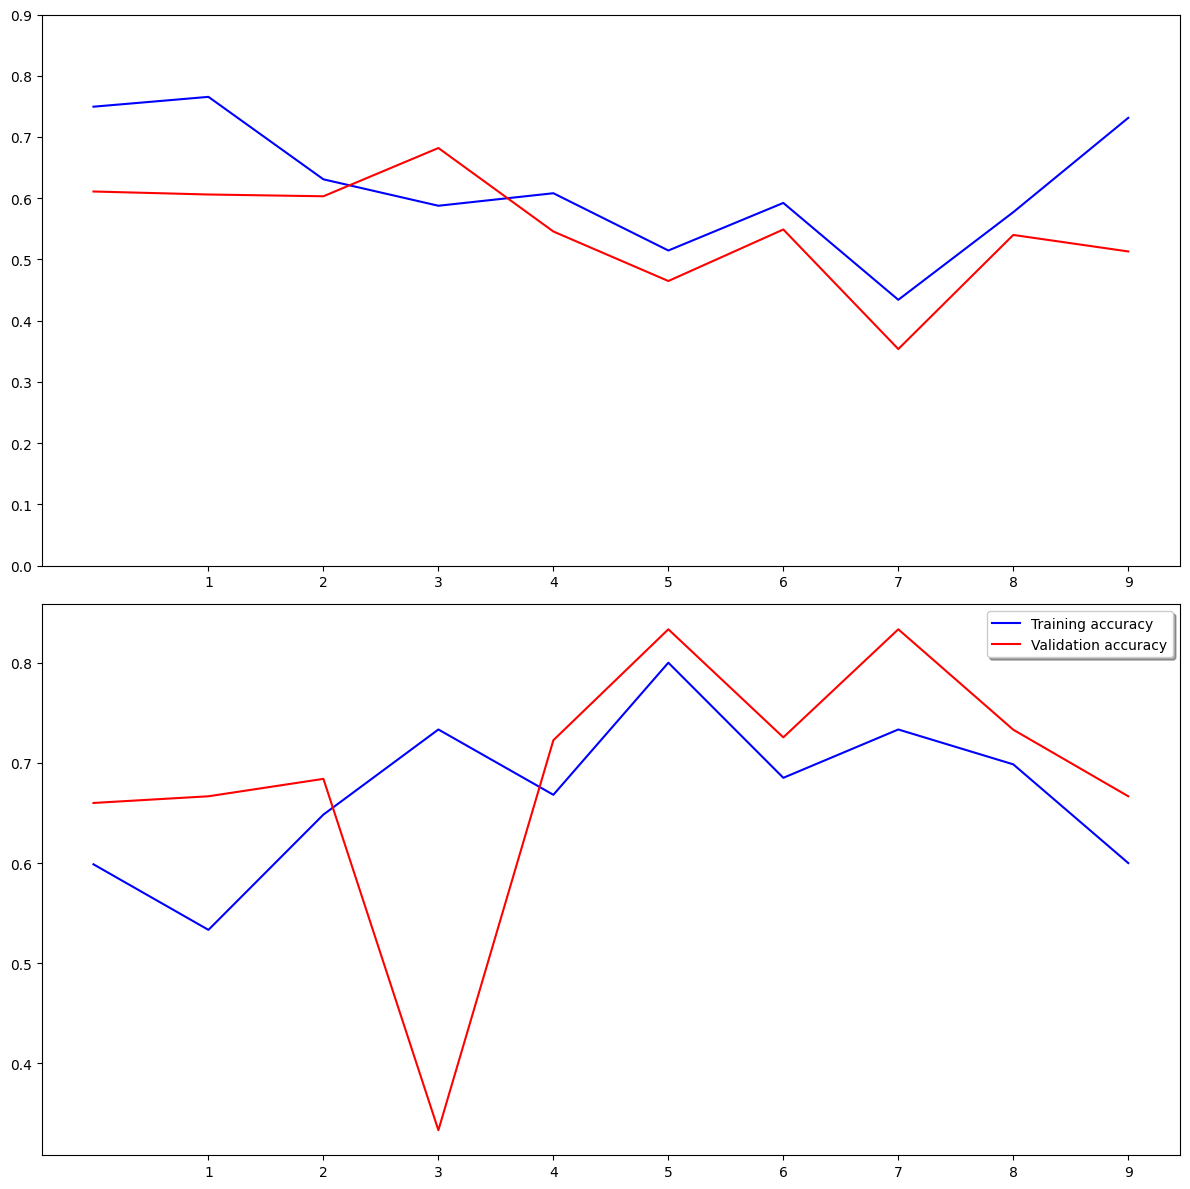

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Lists all the filenames in the ../data/test directory and creates a DataFrame to store them.

In [ ]:
test_filenames = os.listdir("../data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

It then extracts the category ('dog' or 'cat') from each filename by checking if the filename starts with 'dog' or not. These categories are stored as a new column, True_labels, in the DataFrame.

In [ ]:
test_categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        test_categories.append('dog')
    else:
        test_categories.append('cat')

In [ ]:
test_df['True_labels'] = test_categories
test_df.head()

,filename,True_labels
0,dog.1724.jpg,dog
1,dog.1742.jpg,dog
2,dog.1681.jpg,dog
3,dog.1730.jpg,dog
4,dog.1750.jpg,dog


Creates a generator to load and preprocess test images from filenames in test_df, rescaling pixel values, resizing to IMAGE_SIZE, and batching without labels or shuffling.

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "../data/test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 4004 validated image filenames.


Making predicitions

In [ ]:
predictions = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


267/267 ━━━━━━━━━━━━━━━━━━━━ 125s 470ms/step


Predicts categories (cat or dog) for test images using np.argmax, maps numeric predictions to labels, replaces them with binary values (cat=0, dog=1), and plots the category distribution.

In [ ]:
test_df['category'] = np.argmax(predictions, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<ipython-input-18-338364ba4864>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='category'>

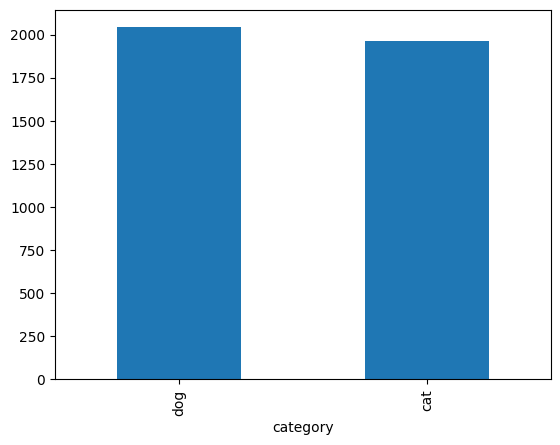

In [ ]:
test_df['category'].value_counts().plot.bar()

Displays 18 sample test images with their predicted categories using matplotlib. Images are loaded, resized, and shown in a grid.

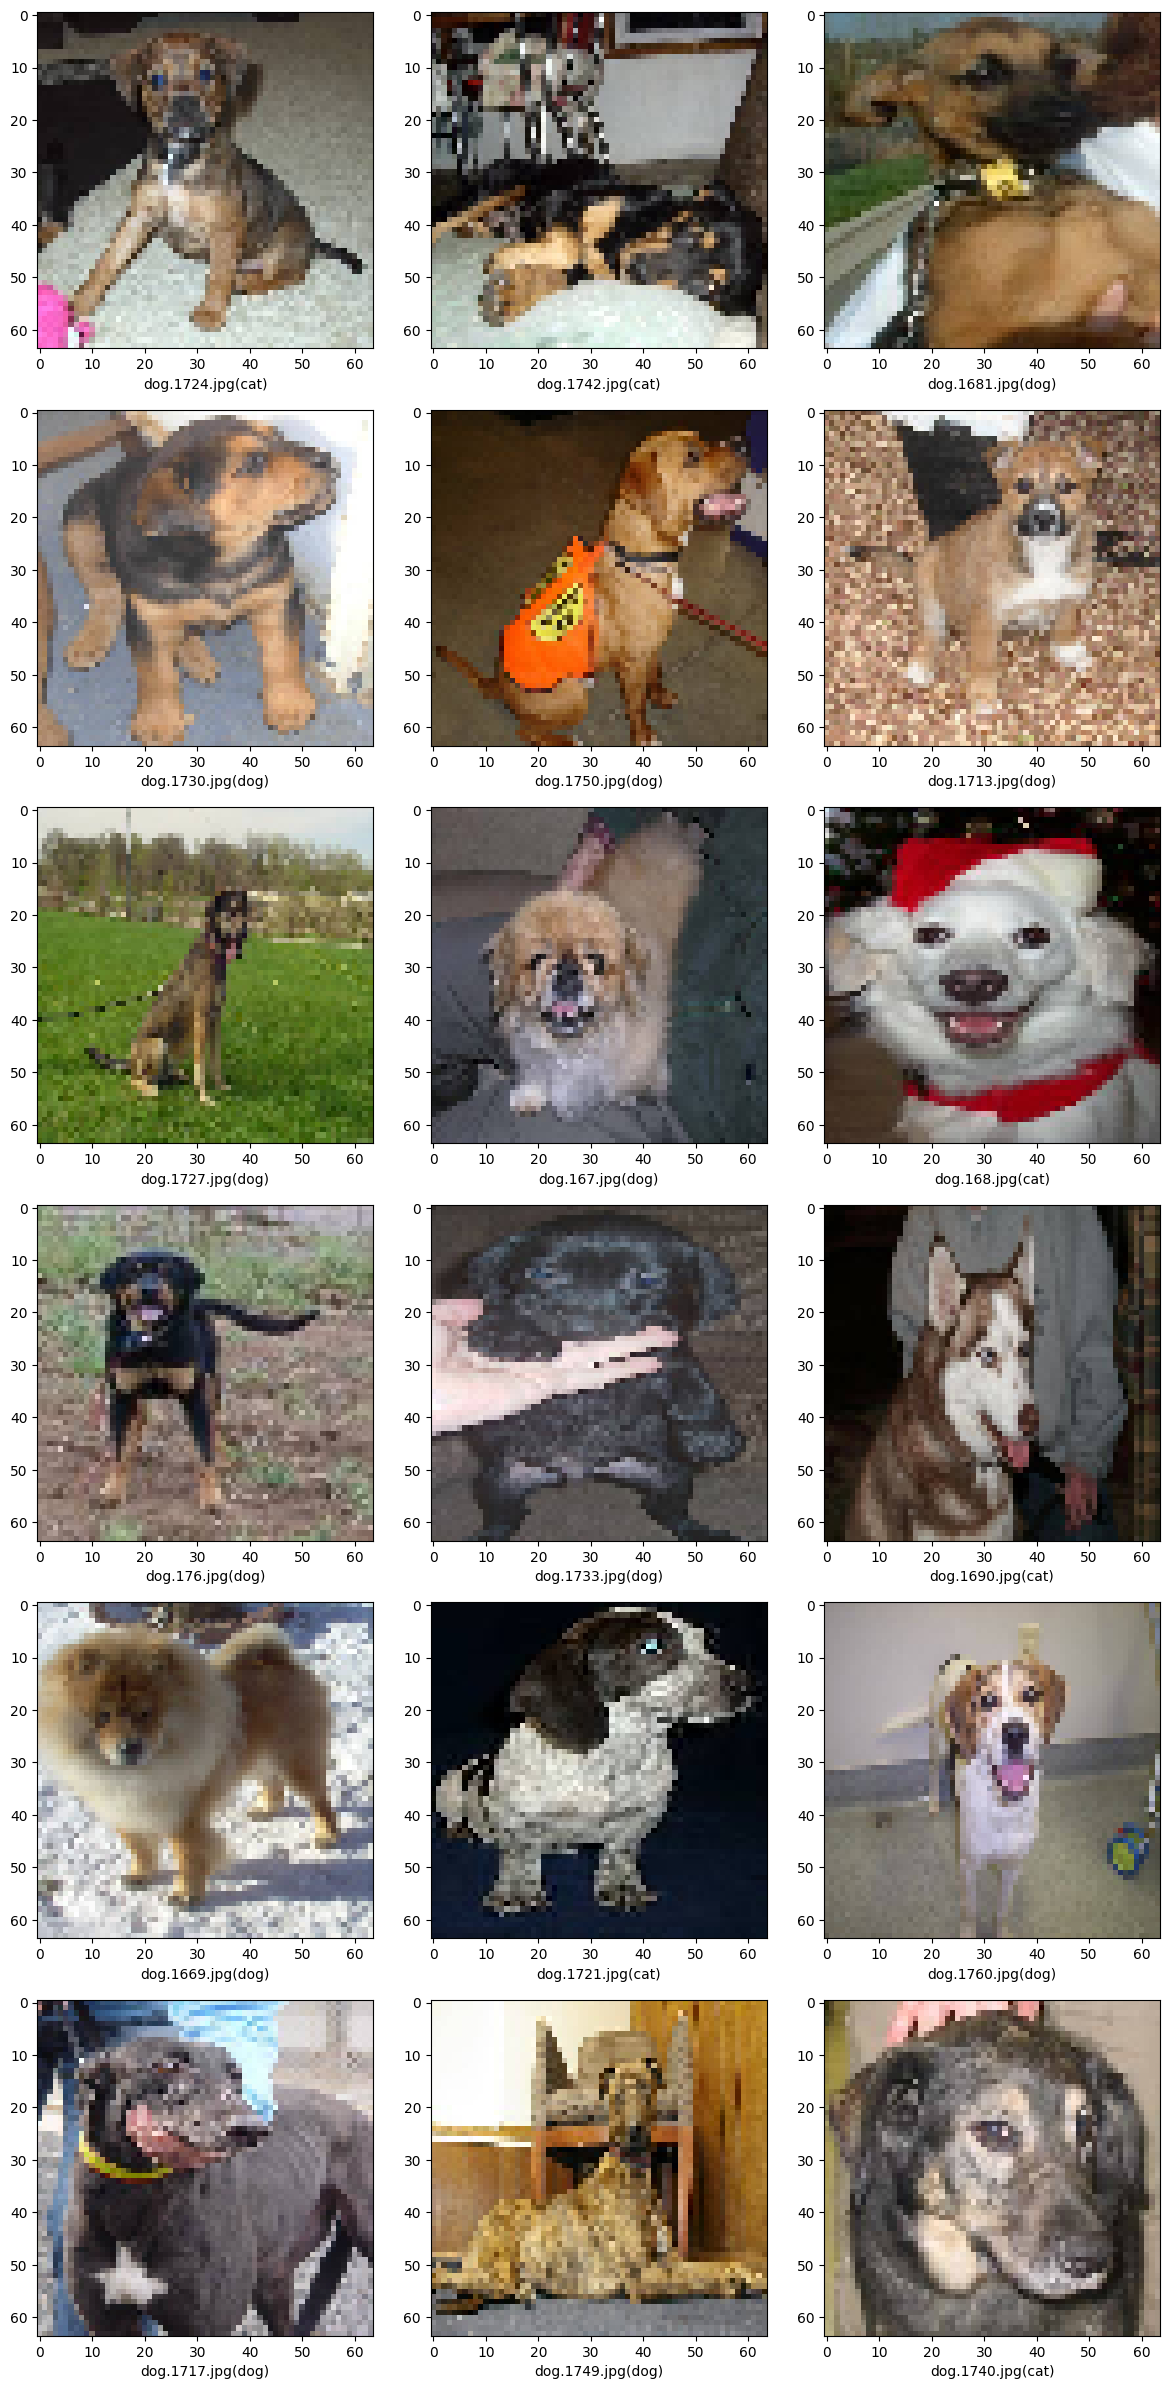

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../data/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()


Creates a results DataFrame (result_df), adds an ID column, maps categories to labels, removes unnecessary columns, and saves the DataFrame to a CSV file (result.csv).

In [ ]:
result_df = test_df.copy()
result_df['id'] = result_df['filename'].str.split('.').str[0]
result_df['label'] = result_df['category']
result_df.drop(['filename', 'category'], axis=1, inplace = True)
result_df.to_csv('result.csv', index = False)

Computes a confusion matrix comparing true labels and predicted labels, and prints the matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
result_df.head()

,True_labels,id,label
0,dog,dog,cat
1,dog,dog,cat
2,dog,dog,dog
3,dog,dog,dog
4,dog,dog,dog


In [ ]:
result = confusion_matrix(result_df['True_labels'],result_df['label'])

In [ ]:
print(result)

[[1452  548]
 [ 510 1494]]


Normalizes the confusion matrix, then visualizes it using seaborn as a heatmap, showing the relationship between true and predicted labels.

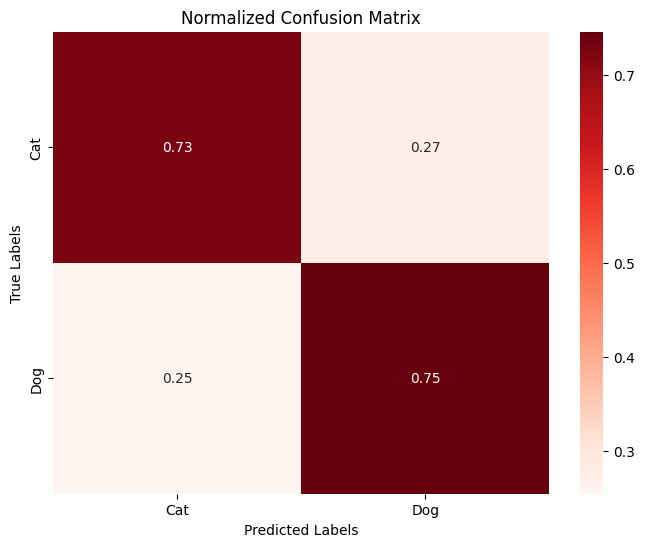

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(result_df['True_labels'], result_df['label'])

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Reds', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Calculates performance metrics (accuracy, precision, recall, F1 score) for the model and displays a detailed classification report for cat and dog predictions.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_true = result_df['True_labels']
y_pred = result_df['label']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))


Accuracy: 0.7358
Precision: 0.7358
Recall: 0.7358
F1 Score: 0.7357

Classification Report:
              precision    recall  f1-score   support

         Cat       0.74      0.73      0.73      2000
         Dog       0.73      0.75      0.74      2004

    accuracy                           0.74      4004
   macro avg       0.74      0.74      0.74      4004
weighted avg       0.74      0.74      0.74      4004



Plots a bar graph of the category distribution in the predictions (cat and dog) for visual analysis.

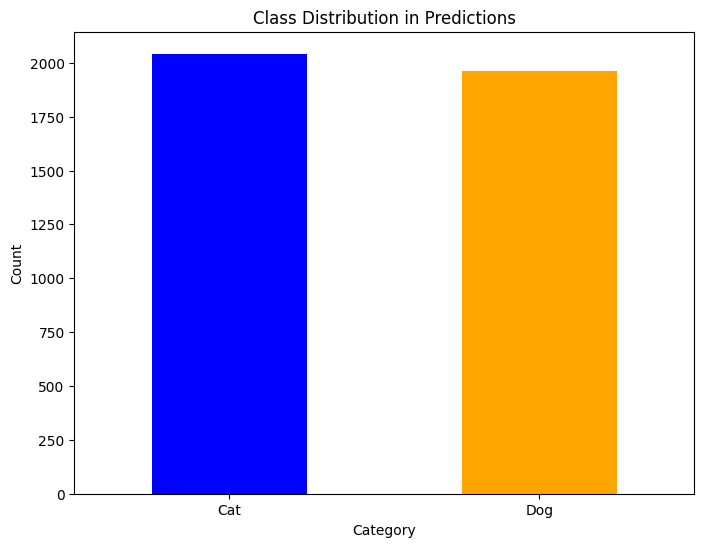

In [ ]:
test_df['category'].value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Class Distribution in Predictions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Cat', 'Dog'], rotation=0)
plt.show()


Makes sure the directory for saving the model exists and saves the trained model's weights as model.weights.h5 in the specified path.

In [ ]:

# Create the directory if it doesn't exist
import os
os.makedirs("../models/", exist_ok=True)
model.save_weights("../modelss/model.weights.h5")